# This is my process notebook for Assignment 2

In this notebook, I perform cursory analysis on the datasets provided, and complete three driving questions:
Did I achieve my goal of X steps more in the last 12 months than the 12 months before that?
Do I have more steps on the weekend in comparison to weekdays?
In which hour of the day do I walk the most?

We begin by importing the relevant libraries:

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Next we read in the data from the datasets provided.

In [47]:
person_1 = pd.read_csv('../data/person1-step-data.csv')
person_2 = pd.read_csv('../data/person2-step-data.csv')

I now take a glimpse at the data, beginning with Person 1.

In [48]:
person_1.sample(5)

,Source,Date,Hour,Count
145274,Person1 Health Mate,2018-01-12,17,7
56316,Person1 iPhone SE,2015-05-18,7,22
21851,Person1 iPhone SE,2015-02-04,16,5
146553,Person1 Health Mate,2018-02-12,14,6
58768,Person1 iPhone SE,2015-05-23,14,2


In [49]:
person_1.describe()

,Hour,Count
count,183787.000000,183787.000000
mean,12.706356,79.791558
std,4.882472,358.099285
min,0.000000,1.000000
25%,9.000000,6.000000
50%,12.000000,17.000000
75%,16.000000,35.000000
max,23.000000,88359.000000


Now, I look at Person 2's data to see if the columns and such are the same.

In [50]:
person_2.sample(5)


,Source,Date,Hour,Count
74463,Person2 Phone,2015-03-22,14,45
436639,Person2 Watch,2020-12-11,17,64
126263,Person2 Watch,2016-03-10,17,97
424685,Person2 Watch,2020-09-29,7,132
286811,Person2 Watch,2018-07-29,15,88


In [51]:
person_2.describe()

,Hour,Count
count,486259.000000,486259.000000
mean,13.176791,71.487286
std,4.667274,190.019984
min,0.000000,1.000000
25%,10.000000,12.000000
50%,13.000000,31.000000
75%,17.000000,87.000000
max,23.000000,89434.000000


I've noticed that we have the Date column, which will be pivotal to our primary driving question, but it needs to be in the proper format.

In [52]:
person_1.dtypes

Source    object
Date      object
Hour       int64
Count      int64
dtype: object

In [53]:
person_2.dtypes

Source    object
Date      object
Hour       int64
Count      int64
dtype: object

The Date should be changed from a string to a datetime type.

In [54]:
person_1['Date'] = pd.to_datetime(person_1['Date'])
person_2['Date'] = pd.to_datetime(person_2['Date'])
print(person_1.dtypes)
print(person_2.dtypes)

Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object
Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object


# Driving question 1: Did I achieve my goal of X steps more in the last 12 months than the 12 months before that?

The way I see it, there is more than one way of going about answering this question - One could take the last 365 days versus the 365 before that, or the last 12 (complete) months vs the last 12 before that.

In this section, I implement the former method - taking each day as its own, and only working with Person 1's dataset for now.

## Day implementation

## Person 1

I begin by grouping the steps from the same day together, and take the sum.

In [55]:
dailystep_1 = person_1.groupby(['Date'])['Count'].sum().reset_index()
print(dailystep_1)

           Date  Count
0    2014-12-07   2693
1    2014-12-08   6567
2    2014-12-09   6879
3    2014-12-10   7845
4    2014-12-11    916
...         ...    ...
2290 2021-09-18  11572
2291 2021-09-19  10789
2292 2021-09-20   8800
2293 2021-09-21  17071
2294 2021-09-22  10220

[2295 rows x 2 columns]


I then create a new dataframe containing only day 1-365, counting backwards.
I decided to go by date and not simply take the last 365 entries, since there were some days with no recorded steps.

In [56]:
one_to_threesixfive = dailystep_1.copy()
target_date = "2020-09-23"
target_date = pd.to_datetime(target_date)
one_to_threesixfive.drop(one_to_threesixfive[one_to_threesixfive['Date']<target_date].index, inplace = True)
one_to_threesixfive = one_to_threesixfive.reset_index(drop = True)
print(one_to_threesixfive)

          Date  Count
0   2020-09-23   1478
1   2020-09-24   7417
2   2020-09-25   1430
3   2020-09-26   1553
4   2020-09-27   3378
..         ...    ...
353 2021-09-18  11572
354 2021-09-19  10789
355 2021-09-20   8800
356 2021-09-21  17071
357 2021-09-22  10220

[358 rows x 2 columns]


Then, I did the same for day 366-730.

In [57]:
threesixfive_to_seventhirty = dailystep_1.copy()
target_date = "2019-09-23"
target_date = pd.to_datetime(target_date)
threesixfive_to_seventhirty.drop(threesixfive_to_seventhirty[threesixfive_to_seventhirty['Date']<target_date].index, inplace = True)
target_2 = "2020-09-22"
threesixfive_to_seventhirty.drop(threesixfive_to_seventhirty[threesixfive_to_seventhirty['Date']>target_2].index, inplace = True)
threesixfive_to_seventhirty = threesixfive_to_seventhirty.reset_index(drop=True)
print(threesixfive_to_seventhirty)

          Date  Count
0   2019-09-23   6386
1   2019-09-24   3010
2   2019-09-25   1926
3   2019-09-26   6226
4   2019-09-27   4393
..         ...    ...
335 2020-09-17   2799
336 2020-09-18   1163
337 2020-09-19   2992
338 2020-09-20   4568
339 2020-09-21    274

[340 rows x 2 columns]


The driving question can then be visualised by plotting a bar chart of the two datasets on the same axis, and we can see that particularly from day ~175 onwards, Person 1 made many more steps in the past 365 days than the 365 before. 

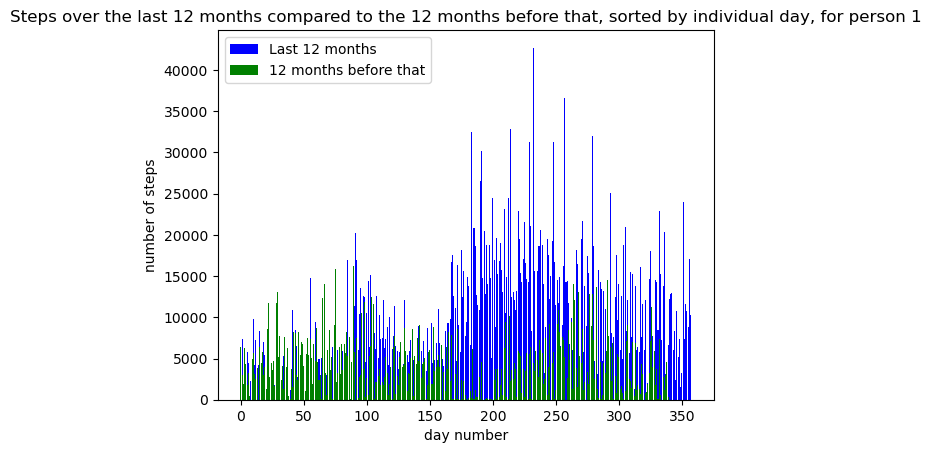

In [58]:
plt.bar(one_to_threesixfive.index, one_to_threesixfive['Count'], label= 'Last 12 months', color = 'b')
plt.bar(threesixfive_to_seventhirty.index, threesixfive_to_seventhirty['Count'], label = '12 months before that', color = 'g')
plt.xlabel("day number")
plt.ylabel("number of steps")
plt.title("Steps over the last 12 months compared to the 12 months before that, sorted by individual day, for person 1")
plt.legend()
plt.show()

## Person 2


The same steps are repeated for Person 2 - I start by grouping the steps from the same day together.

In [59]:
dailystep_2 = person_2.groupby(['Date'])['Count'].sum().reset_index()
print(dailystep_2)

           Date  Count
0    2014-11-29  12464
1    2014-11-30   2759
2    2014-12-01   6672
3    2014-12-02   9658
4    2014-12-03   1709
...         ...    ...
2485 2021-09-18  15250
2486 2021-09-19  19358
2487 2021-09-20   7563
2488 2021-09-21  14232
2489 2021-09-22   4978

[2490 rows x 2 columns]


A new dataframe was created for the past 365 days counting backwards.

In [60]:
one_to_threesixfive = dailystep_2.copy()
target_date = "2020-09-23"
target_date = pd.to_datetime(target_date)
one_to_threesixfive.drop(one_to_threesixfive[one_to_threesixfive['Date']<target_date].index, inplace = True)
one_to_threesixfive = one_to_threesixfive.reset_index(drop = True)
print(one_to_threesixfive)

          Date  Count
0   2020-09-23   8558
1   2020-09-24  18951
2   2020-09-25  11517
3   2020-09-26   3450
4   2020-09-27   8339
..         ...    ...
360 2021-09-18  15250
361 2021-09-19  19358
362 2021-09-20   7563
363 2021-09-21  14232
364 2021-09-22   4978

[365 rows x 2 columns]


A new dataframe was created for the 365 days before that, ie. day 366-730.

In [61]:
threesixfive_to_seventhirty = dailystep_2.copy()
target_date = "2019-09-23"
target_date = pd.to_datetime(target_date)
threesixfive_to_seventhirty.drop(threesixfive_to_seventhirty[threesixfive_to_seventhirty['Date']<target_date].index, inplace = True)
target_2 = "2020-09-22"
threesixfive_to_seventhirty.drop(threesixfive_to_seventhirty[threesixfive_to_seventhirty['Date']>target_2].index, inplace = True)
threesixfive_to_seventhirty = threesixfive_to_seventhirty.reset_index(drop=True)
print(threesixfive_to_seventhirty)

          Date  Count
0   2019-09-23  10996
1   2019-09-24  33508
2   2019-09-25  11781
3   2019-09-26  14790
4   2019-09-27  13235
..         ...    ...
361 2020-09-18  11269
362 2020-09-19  12540
363 2020-09-20   8778
364 2020-09-21   3843
365 2020-09-22   6048

[366 rows x 2 columns]


The bar plot was created in the same fashion as before, and we can see that Person 2 did not make much improvement in the last 365 days compared to before, for the most part.

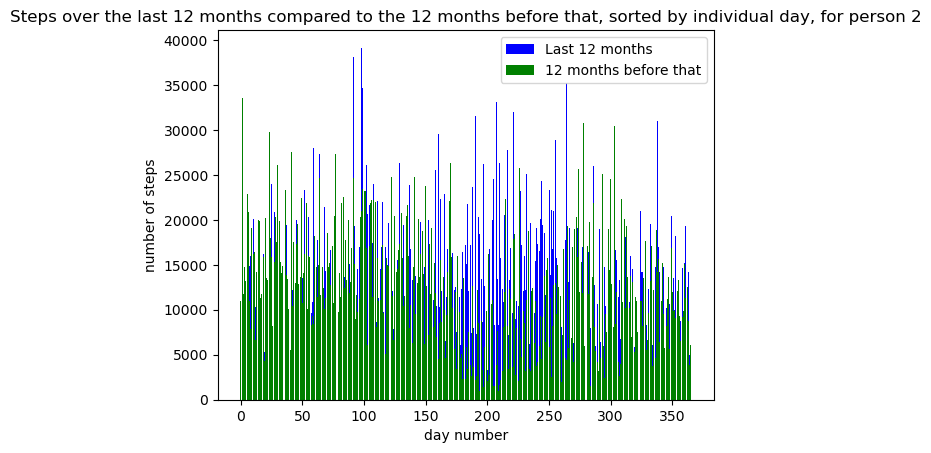

In [62]:
plt.bar(one_to_threesixfive.index, one_to_threesixfive['Count'], label= 'Last 12 months', color = 'b')
plt.bar(threesixfive_to_seventhirty.index, threesixfive_to_seventhirty['Count'], label = '12 months before that', color = 'g')
plt.xlabel("day number")
plt.ylabel("number of steps")
plt.title("Steps over the last 12 months compared to the 12 months before that, sorted by individual day, for person 2")
plt.legend()
plt.show()

## Month implementation

In this section I explore the driving question by taking the last 12 months by month, and comparing them to the 12 months before that. I begin by grouping the months together and taking the sum of the step counts.

## Person 1

Note that I discarded September 2021, as the month was not complete by the time the dataset was aquired.

In [63]:
monthlystep_1 = person_1.groupby(pd.Grouper(key='Date',freq='M')).sum().reset_index()
print(monthlystep_1)


         Date    Hour   Count
0  2014-12-31  112994  111590
1  2015-01-31  142999  131321
2  2015-02-28  125068  106851
3  2015-03-31  113094  101621
4  2015-04-30   91446   91726
..        ...     ...     ...
77 2021-05-31   57159  518898
78 2021-06-30   52603  406440
79 2021-07-31   46846  360565
80 2021-08-31   46017  321087
81 2021-09-30   34106  205743

[82 rows x 3 columns]


As before, a new dataframe was created, containing the data from September 2020 - August 2021. 

In [64]:
first_12 = monthlystep_1.copy()
target_1 = "2020-09-30"
target_2 = "2021-08-31"
target_1 = pd.to_datetime(target_1)
target_2 = pd.to_datetime(target_2)
first_12.drop(first_12[first_12['Date']<target_1].index, inplace = True)
first_12.drop(first_12[first_12['Date']>target_2].index, inplace = True)
first_12 = first_12.reset_index(drop = True)
print(first_12)

         Date   Hour   Count
0  2020-09-30  12926   86170
1  2020-10-31   4663   88564
2  2020-11-30   4871   94503
3  2020-12-31   5744  117473
4  2021-01-31  46363  275575
5  2021-02-28   7778  138177
6  2021-03-31  34124  286459
7  2021-04-30  61030  510989
8  2021-05-31  57159  518898
9  2021-06-30  52603  406440
10 2021-07-31  46846  360565
11 2021-08-31  46017  321087


I then created another dataframe containing data from September 2019 - August 2020.

In [65]:
next_12 = monthlystep_1.copy()
target_1 = "2019-09-30"
target_2 = "2020-08-31"
target_1 = pd.to_datetime(target_1)
target_2 = pd.to_datetime(target_2)
next_12.drop(next_12[next_12['Date']<target_1].index, inplace = True)
next_12.drop(next_12[next_12['Date']>target_2].index, inplace = True)
next_12 = next_12.reset_index(drop = True)
print(next_12)

         Date   Hour   Count
0  2019-09-30   5144  137874
1  2019-10-31   5460  145937
2  2019-11-30   6078  149279
3  2019-12-31   5440  161444
4  2020-01-31   5352  113927
5  2020-02-29   4781  125089
6  2020-03-31   2960   79801
7  2020-04-30   1656   32527
8  2020-05-31   2660   90651
9  2020-06-30   3740  138863
10 2020-07-31  16420  180116
11 2020-08-31   4391   92018


A bar chart was then constructed the same way as before, and the same results could be seen; that beginning from the 6th month onward, Person 1 took many more steps in the last 12 months than the 12 before that.

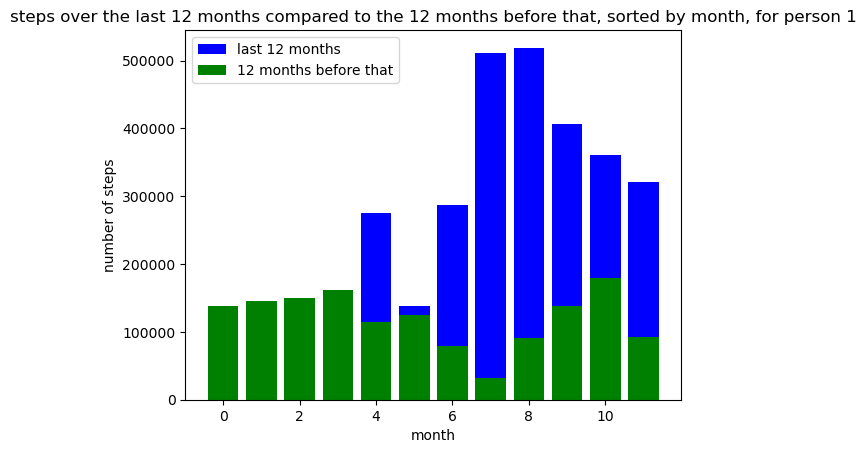

In [66]:
plt.bar(first_12.index, first_12['Count'], label = 'last 12 months', color = 'b')
plt.bar(next_12.index, next_12['Count'], label = '12 months before that', color = 'g')
plt.xlabel('month')
plt.ylabel('number of steps')
plt.title("steps over the last 12 months compared to the 12 months before that, sorted by month, for person 1")
plt.legend()
plt.show()

## Person 2

I group the counts together by month, as before.

In [67]:
monthlystep_2 = person_2.groupby(pd.Grouper(key='Date',freq='M')).sum().reset_index()
print(monthlystep_1)

         Date    Hour   Count
0  2014-12-31  112994  111590
1  2015-01-31  142999  131321
2  2015-02-28  125068  106851
3  2015-03-31  113094  101621
4  2015-04-30   91446   91726
..        ...     ...     ...
77 2021-05-31   57159  518898
78 2021-06-30   52603  406440
79 2021-07-31   46846  360565
80 2021-08-31   46017  321087
81 2021-09-30   34106  205743

[82 rows x 3 columns]


A new dataframe was created, containing data from September 2020 - August 2021.

In [68]:
first_12 = monthlystep_2.copy()
target_1 = "2020-09-30"
target_2 = "2021-08-31"
target_1 = pd.to_datetime(target_1)
target_2 = pd.to_datetime(target_2)
first_12.drop(first_12[first_12['Date']<target_1].index, inplace = True)
first_12.drop(first_12[first_12['Date']>target_2].index, inplace = True)
first_12 = first_12.reset_index(drop = True)
print(first_12)

         Date   Hour   Count
0  2020-09-30  64916  310559
1  2020-10-31  56550  331005
2  2020-11-30  66304  384620
3  2020-12-31  74376  421924
4  2021-01-31  74172  464133
5  2021-02-28  66830  350550
6  2021-03-31  60553  431980
7  2021-04-30  83196  464654
8  2021-05-31  92456  481775
9  2021-06-30  89455  388278
10 2021-07-31  52016  358176
11 2021-08-31  52290  343661


A new dataframe was created, containing data from September 2019 - August 2020.

In [69]:
next_12 = monthlystep_2.copy()
target_1 = "2019-09-30"
target_2 = "2020-08-31"
target_1 = pd.to_datetime(target_1)
target_2 = pd.to_datetime(target_2)
next_12.drop(next_12[next_12['Date']<target_1].index, inplace = True)
next_12.drop(next_12[next_12['Date']>target_2].index, inplace = True)
next_12 = next_12.reset_index(drop = True)
print(next_12)

         Date   Hour   Count
0  2019-09-30  81092  562763
1  2019-10-31  76037  489304
2  2019-11-30  70205  433584
3  2019-12-31  83614  493272
4  2020-01-31  72914  483335
5  2020-02-29  62478  405471
6  2020-03-31  62392  280144
7  2020-04-30  47678  199847
8  2020-05-31  68276  290695
9  2020-06-30  68510  363137
10 2020-07-31  71178  359481
11 2020-08-31  74017  354548


A bar chart was constructed like before, drawing the same conclusions as before.

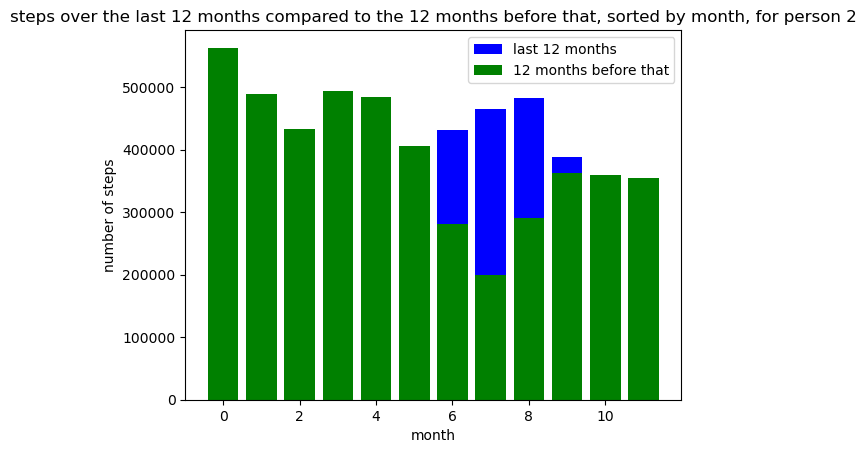

In [70]:
plt.bar(first_12.index, first_12['Count'], label = 'last 12 months', color = 'b')
plt.bar(next_12.index, next_12['Count'], label = '12 months before that', color = 'g')
plt.xlabel('month')
plt.ylabel('number of steps')
plt.title("steps over the last 12 months compared to the 12 months before that, sorted by month, for person 2")
plt.legend()
plt.show()

# Driving Question 2: Do people walk more on the weekends than weekdays?

For the next section, I considered another driving question, and decided to examine the days of the week, without comparing the individual's improvement over time.

## Person 1

I started by grouping the steps from the same day together.

In [71]:
dailystep_1 = person_1.groupby(['Date'])['Count'].sum().reset_index()
print(dailystep_1)

           Date  Count
0    2014-12-07   2693
1    2014-12-08   6567
2    2014-12-09   6879
3    2014-12-10   7845
4    2014-12-11    916
...         ...    ...
2290 2021-09-18  11572
2291 2021-09-19  10789
2292 2021-09-20   8800
2293 2021-09-21  17071
2294 2021-09-22  10220

[2295 rows x 2 columns]


Next, I needed to group the data together by which day of the week it was. I started by making a new column for this purpose.

In [72]:
dailystep_1['day_of_week'] = dailystep_1['Date'].dt.dayofweek
print(dailystep_1)

           Date  Count  day_of_week
0    2014-12-07   2693            6
1    2014-12-08   6567            0
2    2014-12-09   6879            1
3    2014-12-10   7845            2
4    2014-12-11    916            3
...         ...    ...          ...
2290 2021-09-18  11572            5
2291 2021-09-19  10789            6
2292 2021-09-20   8800            0
2293 2021-09-21  17071            1
2294 2021-09-22  10220            2

[2295 rows x 3 columns]


I then grouped them together and got the average step count for each day of the week.

In [73]:
dailystep_1 = dailystep_1.drop(columns=['Date'])
dailystep_1 = dailystep_1.groupby('day_of_week').mean().reset_index()
dailystep_1

,day_of_week,Count
0,0,6004.833828
1,1,6046.846608
2,2,6300.564565
3,3,7034.276471
4,4,6424.283626
5,5,6111.533101
6,6,6783.230284


I then mapped the row values from 0-6 to the actual days of the week

In [74]:
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
dailystep_1 = dailystep_1.replace({'day_of_week':day_map})
print(dailystep_1)

  day_of_week        Count
0      Monday  6004.833828
1     Tuesday  6046.846608
2   Wednesday  6300.564565
3    Thursday  7034.276471
4      Friday  6424.283626
5    Saturday  6111.533101
6      Sunday  6783.230284


Finally, the bar chart for average steps each day of the week was outputted like so.

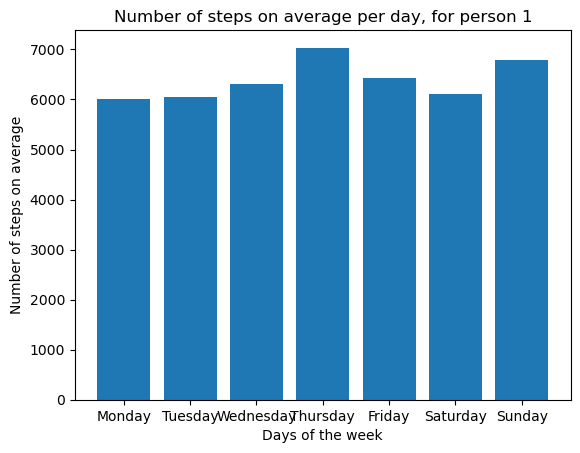

In [75]:
plt.bar(dailystep_1['day_of_week'], dailystep_1['Count'])
plt.xlabel("Days of the week")
plt.ylabel("Number of steps on average")
plt.title("Number of steps on average per day, for person 1")
plt.show()

## Person 2

Repeating the steps from earlier, I grouped the counts together by date.

In [76]:
dailystep_2 = person_2.groupby(['Date'])['Count'].sum().reset_index()
print(dailystep_2)

           Date  Count
0    2014-11-29  12464
1    2014-11-30   2759
2    2014-12-01   6672
3    2014-12-02   9658
4    2014-12-03   1709
...         ...    ...
2485 2021-09-18  15250
2486 2021-09-19  19358
2487 2021-09-20   7563
2488 2021-09-21  14232
2489 2021-09-22   4978

[2490 rows x 2 columns]


Next I created a new column telling us which day of the week it is.

In [77]:
dailystep_2['day_of_week'] = dailystep_2['Date'].dt.dayofweek
print(dailystep_2)

           Date  Count  day_of_week
0    2014-11-29  12464            5
1    2014-11-30   2759            6
2    2014-12-01   6672            0
3    2014-12-02   9658            1
4    2014-12-03   1709            2
...         ...    ...          ...
2485 2021-09-18  15250            5
2486 2021-09-19  19358            6
2487 2021-09-20   7563            0
2488 2021-09-21  14232            1
2489 2021-09-22   4978            2

[2490 rows x 3 columns]


They were then grouped together and an average calculated.

In [78]:
dailystep_2 = dailystep_2.drop(columns=['Date'])
dailystep_2 = dailystep_2.groupby('day_of_week').mean().reset_index()
dailystep_2

,day_of_week,Count
0,0,13080.457865
1,1,14603.320225
2,2,13848.317416
3,3,14362.374648
4,4,14236.408451
5,5,11692.351124
6,6,15901.306180


The days were mapped to text.

In [79]:
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
dailystep_2 = dailystep_2.replace({'day_of_week':day_map})
print(dailystep_2)

  day_of_week         Count
0      Monday  13080.457865
1     Tuesday  14603.320225
2   Wednesday  13848.317416
3    Thursday  14362.374648
4      Friday  14236.408451
5    Saturday  11692.351124
6      Sunday  15901.306180


Lastly, the bar plot was created.

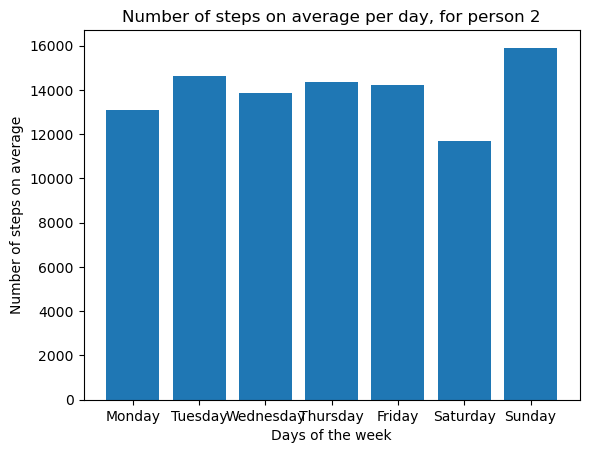

In [80]:
plt.bar(dailystep_2['day_of_week'], dailystep_2['Count'])
plt.xlabel("Days of the week")
plt.ylabel("Number of steps on average")
plt.title("Number of steps on average per day, for person 2")
plt.show()

# Driving Question 3: Which hour of the day did I have the most walking done?

An additional investigation I thought would be interesting was which hour saw the most activity from both Person 1 and Person 2.

## Person 1

First I grouped the data by hour, dropping the Date column as it was not needed. Note that the step counts were summed up, not an average. 

In [81]:
hourcount_1s = person_1.groupby(['Hour'])['Count'].sum().reset_index()
print(hourcount_1s)

    Hour    Count
0      0    95018
1      1   107315
2      2   104659
3      3   225085
4      4   123547
5      5   157024
6      6   360684
7      7   622245
8      8   871074
9      9  1200644
10    10  1415630
11    11  1430857
12    12  1205922
13    13  1097031
14    14   875307
15    15   846603
16    16   962518
17    17  1070590
18    18   639847
19    19   476728
20    20   312444
21    21   234996
22    22   140764
23    23    88119


From there, I plotted a bar graph of the hours and the total step counts for each.

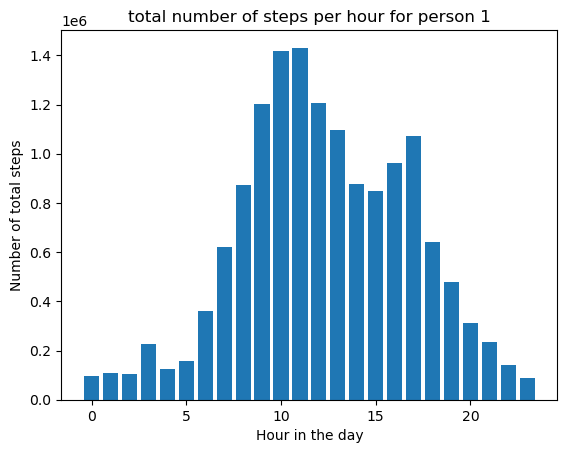

In [82]:
plt.bar(hourcount_1s['Hour'], hourcount_1s['Count'])
plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("total number of steps per hour for person 1")
plt.show()

The average can be considered too, instead of summing the counts together.

In [83]:
hourcount_1a = person_1.groupby(['Hour'])['Count'].mean().reset_index()
print(hourcount_1a)

    Hour       Count
0      0   49.540146
1      1   55.719107
2      2   72.882312
3      3  102.079365
4      4   68.145063
5      5   57.266229
6      6   96.465365
7      7   93.711596
8      8   80.446435
9      9   85.607415
10    10   92.163411
11    11   92.432623
12    12   81.552850
13    13   80.081101
14    14   85.730362
15    15   84.575724
16    16   83.111821
17    17   93.623962
18    18   65.390598
19    19   55.292044
20    20   54.632628
21    21   57.512482
22    22   43.392109
23    23   35.289948


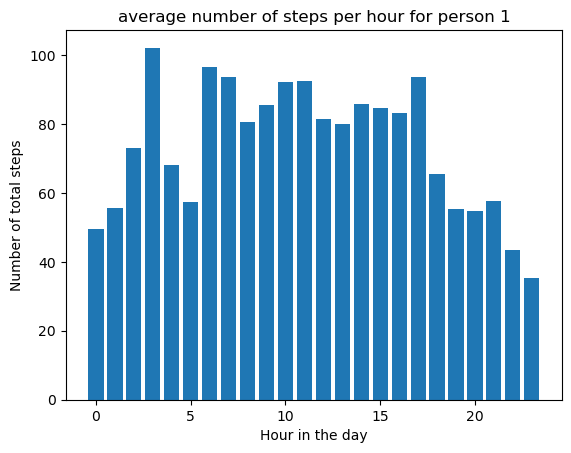

In [84]:
plt.bar(hourcount_1a['Hour'], hourcount_1a['Count'])
plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("average number of steps per hour for person 1")
plt.show()

## Person 2

Following the above steps, I grouped the data by hour and dropped the Date column. 

In [85]:
hourcount_2s = person_2.groupby(['Hour'])['Count'].sum().reset_index()
print(hourcount_2s)

    Hour    Count
0      0   237370
1      1   262875
2      2   260397
3      3   344751
4      4   388077
5      5   408604
6      6   894145
7      7  1474298
8      8  2292903
9      9  2897465
10    10  3221480
11    11  3105063
12    12  2773141
13    13  2544965
14    14  1978490
15    15  1652594
16    16  1928721
17    17  2184670
18    18  1965479
19    19  1597183
20    20   996595
21    21   649852
22    22   437845
23    23   264373


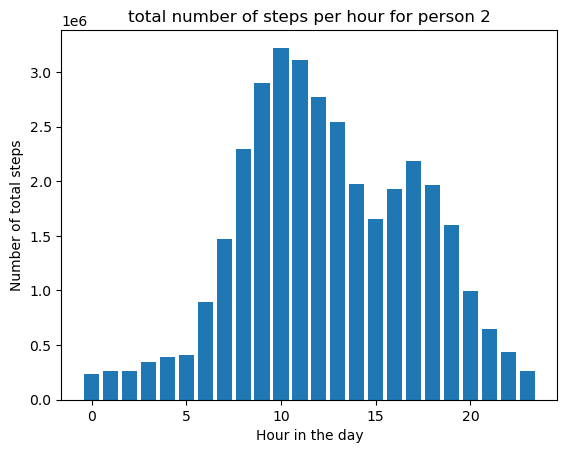

In [86]:
plt.bar(hourcount_2s['Hour'], hourcount_2s['Count'])
plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("total number of steps per hour for person 2")
plt.show()

Doing the same, but using means instead of summing up the step counts.

In [87]:
hourcount_2a = person_2.groupby(['Hour'])['Count'].mean().reset_index()
print(hourcount_2a)

    Hour       Count
0      0  100.198396
1      1   99.838587
2      2   95.139569
3      3  113.629202
4      4  102.233140
5      5   85.303549
6      6   80.415955
7      7   79.816902
8      8   80.818547
9      9   80.395810
10    10   84.684419
11    11   80.161688
12    12   72.564920
13    13   71.705314
14    14   69.728977
15    15   64.151003
16    16   67.814810
17    17   69.117628
18    18   56.668176
19    19   51.550302
20    20   50.833716
21    21   53.114181
22    22   57.985035
23    23   83.319571


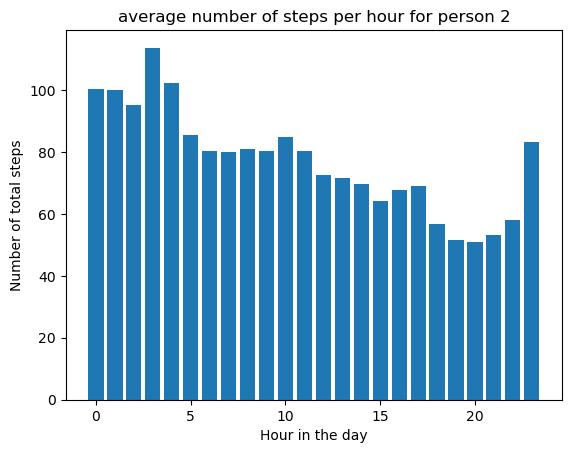

In [88]:
plt.bar(hourcount_2a['Hour'], hourcount_2a['Count'])
plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("average number of steps per hour for person 2")
plt.show()

The bar plots can also be compared side by side.

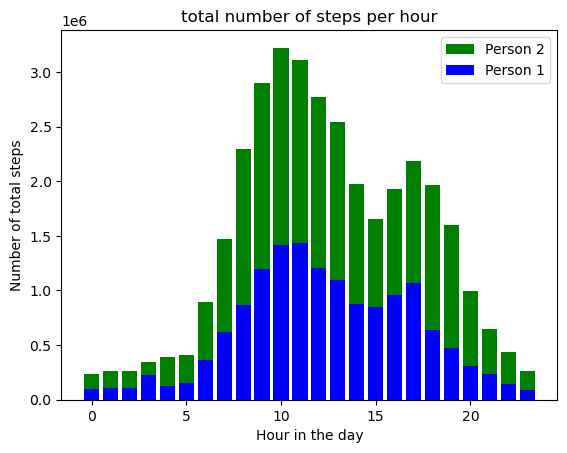

In [89]:
plt.bar(hourcount_2s['Hour'], hourcount_2s['Count'], label = 'Person 2', color = 'g')
plt.bar(hourcount_1s['Hour'], hourcount_1s['Count'], label = 'Person 1', color = 'b')
plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("total number of steps per hour")
plt.legend()
plt.show()

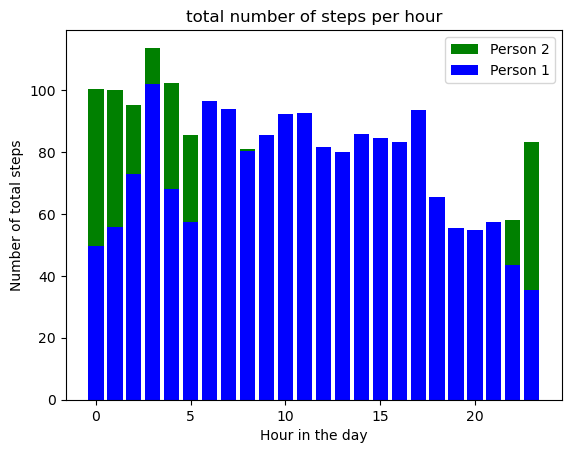

In [90]:
plt.bar(hourcount_2a['Hour'], hourcount_2a['Count'], label = 'Person 2', color = 'g')
plt.bar(hourcount_1a['Hour'], hourcount_1a['Count'], label = 'Person 1', color = 'b')

plt.xlabel('Hour in the day')
plt.ylabel('Number of total steps')
plt.title("total number of steps per hour")
plt.legend()
plt.show()

From this, we can see that though their activity levels are actually quite similar, Person 2 actually has far more steps in total in their dataset, presumably due to better adherence. 